In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [2]:
sensor_list = ['MOD-PM-00454', 'MOD-PM-00459', 'MOD-PM-00461']
supersite_data = pd.read_csv(home_path + 'manchester/supersite/hourly_data/final_supersite_merged.csv')
supersite_data['Datetime'] = pd.to_datetime(supersite_data['Datetime'])
supersite_data.rename(columns={'Datetime': 'timestamp'}, inplace=True)
sensor_datapath_ajusted = home_path + '0_lcz_mcr/output_analysis/single_point/calibration/adjusted_three_sensor/'
output_dir = home_path + '0_lcz_mcr/output_analysis/single_point/calibration_conducted/'

In [3]:
labelsize = 6
fontsize = 6
boundarywidth = 0.5
labelcolor = '#6b6b6b'
lc1 = '#6e1913'
lc3 = '#f62d18'
lc6 = '#30b5d6'
lc0 = '#000000' # black
lc_list = ['#9c9c9c', lc0]
linewidth = 0.1
pad = 1
xwidth = 0.5
length = 4
padding = 5
handletextpad = 0.5
order_list1 = ['(a) ', '(b) ', '(c) ']
order_list2 = ['(d) ', '(e) ', '(f) ']
unit_list = ['°C', '%']

/tmp/ipykernel_1777588/3918563552.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  tolerance=pd.Timedelta('1H'))
/tmp/ipykernel_1777588/3918563552.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  tolerance=pd.Timedelta('1H'))
/tmp/ipykernel_1777588/3918563552.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  tolerance=pd.Timedelta('1H'))


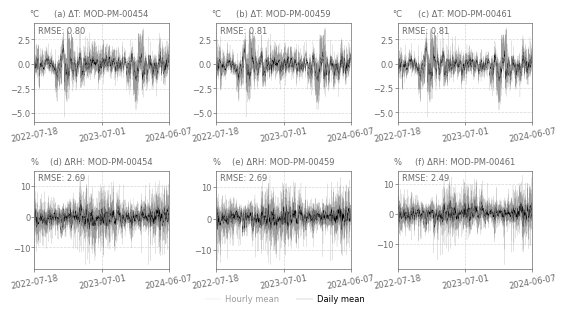

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(5.5, 3))
ax = axes.flatten()

for i, sensor in enumerate(sensor_list):
    sensor_df = pd.read_csv(sensor_datapath_ajusted + sensor + '.csv')
    sensor_df['timestamp'] = pd.to_datetime(sensor_df['timestamp'])
    merged_df = pd.merge_asof(sensor_df.sort_values('timestamp'), 
                              supersite_data[['timestamp', 'TBOT', 'RH']].sort_values('timestamp'), 
                              on='timestamp', 
                              direction='nearest', 
                              tolerance=pd.Timedelta('1H'))
    merged_df['diff_tem'] = merged_df['temp_hourly_avg_corrected'] - merged_df['TBOT']
    merged_df['diff_rh'] = merged_df['rh_hourly_avg_corrected'] - merged_df['RH']  
    merged_df['diff_tem_day'] = (merged_df['temp_hourly_avg_corrected'] - merged_df['TBOT']).rolling(window=24, min_periods=1).mean()
    merged_df['diff_rh_day'] = (merged_df['rh_hourly_avg_corrected'] - merged_df['RH']).rolling(window=24, min_periods=1).mean()  
    
    ax[i].plot(merged_df['timestamp'], merged_df['diff_tem'], linewidth = linewidth, color = lc_list[0], label = 'Hourly mean')
    ax[i+3].plot(merged_df['timestamp'], merged_df['diff_rh'], linewidth = linewidth, color = lc_list[0])
    ax[i].plot(merged_df['timestamp'], merged_df['diff_tem_day'], linewidth = linewidth, color = lc_list[1], label = 'Daily mean')
    ax[i+3].plot(merged_df['timestamp'], merged_df['diff_rh_day'], linewidth = linewidth, color = lc_list[1])    
    ax[i].set_title(order_list1[i]+ 'ΔT: ' + sensor, fontsize = fontsize, color = labelcolor, pad = padding)
    ax[i+3].set_title(order_list2[i] + 'ΔRH: ' + sensor, fontsize = fontsize, color = labelcolor, pad = padding)
    #ax[i].set_ylim(0, 10)
    #ax[i+3].set_ylim(-30, 0)
    rmse_tem = np.sqrt(np.mean(merged_df['diff_tem'] ** 2))
    rmse_rh = np.sqrt(np.mean(merged_df['diff_rh'] ** 2))
    ax[i].text(0.03, 0.9, f"RMSE: {rmse_tem:.2f}", fontsize = fontsize, color = labelcolor, transform=ax[i].transAxes)
    ax[i+3].text(0.03, 0.9, f"RMSE: {rmse_rh:.2f}", fontsize = fontsize, color = labelcolor, transform=ax[i+3].transAxes)
     
    for j in range(2):  
        ax[i + j * 3].set_ylabel(unit_list[j], labelpad=5, rotation=0, ha='center', fontsize=labelsize,color=labelcolor)
        ax[i + j * 3].yaxis.set_label_coords(0, 1.05) 
        ax[i + j * 3].set_xticks([merged_df['timestamp'].iloc[0], pd.Timestamp('2023-07-01 00:00:00'), merged_df['timestamp'].iloc[-1]])
        ax[i + j * 3].tick_params(axis='both', labelsize=labelsize, length=2, pad =0.1, width = boundarywidth)
        ax[i + j * 3].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, color=labelcolor, labelcolor=labelcolor, labelsize=fontsize, pad=pad, width=xwidth, length=length/2)
        ax[i + j * 3].tick_params(axis='x', which='both', left=True, right=False, labelleft=True, color=labelcolor, 
                                  labelcolor=labelcolor, labelsize=fontsize, pad=pad, width=xwidth, length=length/2, rotation=10)
        ax[i + j * 3].set_xlim(merged_df['timestamp'].iloc[0], merged_df['timestamp'].iloc[-1])
        ax[i + j * 3].grid(True, which='both', axis='both',linestyle='--',linewidth=0.5, alpha=0.5)
        for spine in ax[i + j * 3].spines.values():
            spine.set_linewidth(boundarywidth)
            spine.set_edgecolor(labelcolor)

line, label = ax[0].get_legend_handles_labels()  
legend = fig.legend(line, label, bbox_to_anchor=(0.5, -0.02), loc='lower center', frameon=False, handletextpad=handletextpad, fontsize=fontsize, ncol=2)
for m, text in enumerate(legend.get_texts()):
        text.set_color(lc_list[m])

plt.subplots_adjust(left=0.045, right=0.95, bottom=0.12, top=0.94, wspace=0.35, hspace= 0.5)  
plt.savefig(output_dir + 'three_sensor_adjusted.png', dpi=300)
plt.savefig(output_dir + 'three_sensor_adjusted.pdf', dpi=600)